# ROC - Receiver Operating Characteristic

# Select the Right Threshold values using ROC Curve

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification

In [2]:
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)

In [3]:
X.shape

(2000, 20)

In [4]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [6]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## Random Forests

In [8]:
# Apply Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9811666666666666


In [9]:
ytrain_pred

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [0.01, 0.99],
       ...,
       [0.97, 0.03],
       [0.99, 0.01],
       [0.37, 0.63]])

# Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


# Adaboost Classifier

In [11]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


# KNNClassifier

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.981670071491109
Adaboost test roc-auc: 0.9426111111111111


# Now we will focus on selecting the best threshold for maximum accuracy

In [14]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9848444444444444


In [15]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.99,0.991861,0.559186,1.0
1,0.01,0.000008,0.463282,0.0
2,0.99,0.966929,0.538202,0.8
3,0.94,0.761539,0.509875,0.8
4,0.57,0.779443,0.490344,0.4
...,...,...,...,...
595,0.00,0.024239,0.461121,0.0
596,0.02,0.000003,0.441377,0.0
597,0.97,0.984385,0.532403,1.0
598,0.01,0.001147,0.441720,0.2


In [16]:
pd.concat(pred)

0      0.99
1      0.01
2      0.99
3      0.94
4      0.57
       ... 
595    0.00
596    0.00
597    1.00
598    0.20
599    0.80
Length: 2400, dtype: float64

In [17]:
final_prediction

0      0.885262
1      0.118323
2      0.823783
3      0.752853
4      0.559947
         ...   
595    0.121340
596    0.115345
597    0.871697
598    0.163217
599    0.837357
Length: 600, dtype: float64

In [18]:
# 0 -----> 0.8852 How?
# In oth col add the 4 values and divide by 4 ( mean)
# ans will be 0.8852

In [20]:
#### Calculate the ROc Curve


fpr, tpr, thresholds = roc_curve(y_test, final_prediction)

# FPR = false positive rate

In [22]:
thresholds  # there are a lot of values, which one to take?

array([1.9134413 , 0.9134413 , 0.90422166, 0.90327475, 0.80449934,
       0.8030558 , 0.80129001, 0.79912833, 0.78452438, 0.78321156,
       0.77547465, 0.77537124, 0.72479835, 0.72387362, 0.69794088,
       0.69393711, 0.66006113, 0.65993537, 0.59995356, 0.59236186,
       0.59156376, 0.58675354, 0.56649047, 0.56639283, 0.56308969,
       0.56127948, 0.52605932, 0.49366892, 0.45740225, 0.38557343,
       0.38379719, 0.34268074, 0.34086612, 0.2246341 , 0.22390421,
       0.2219954 , 0.22146893, 0.20352808, 0.20348417, 0.1256704 ,
       0.1253351 , 0.10632697])

In [23]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
28,0.457402,0.961667
27,0.493669,0.958333
26,0.526059,0.956667
25,0.561279,0.950000
24,0.563090,0.950000


In [24]:
accuracy_ls

,thresholds,accuracy
28,0.457402,0.961667
27,0.493669,0.958333
26,0.526059,0.956667
25,0.561279,0.950000
24,0.563090,0.950000
23,0.566393,0.950000
22,0.566490,0.948333
19,0.592362,0.946667
18,0.599954,0.945000
29,0.385573,0.945000


In [25]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

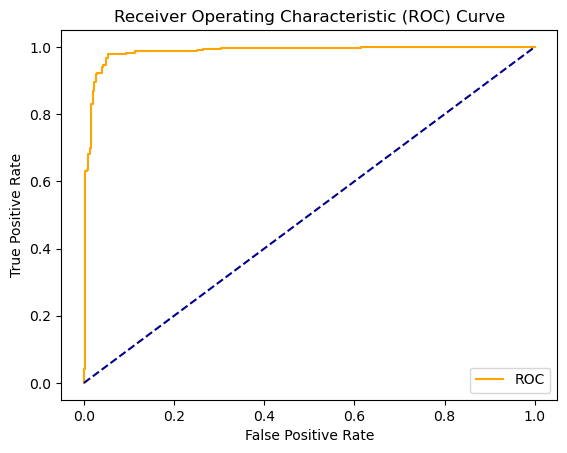

In [26]:
plot_roc_curve(fpr,tpr)